### Práctica de Web Scraping

Se va a considerar una página web de una tienda de internet: https://caorema.com

En la tienda se muestran diferentes objetos para comprar agrupados en 4 páginas. En cada página, cada objeto tiene asociada un conjunto de información: nombre, foto, descripción, precio, valoración y una etiqueta que indica si es una novedad o un top-ventas.

A continuación, se muestra una captura de la página

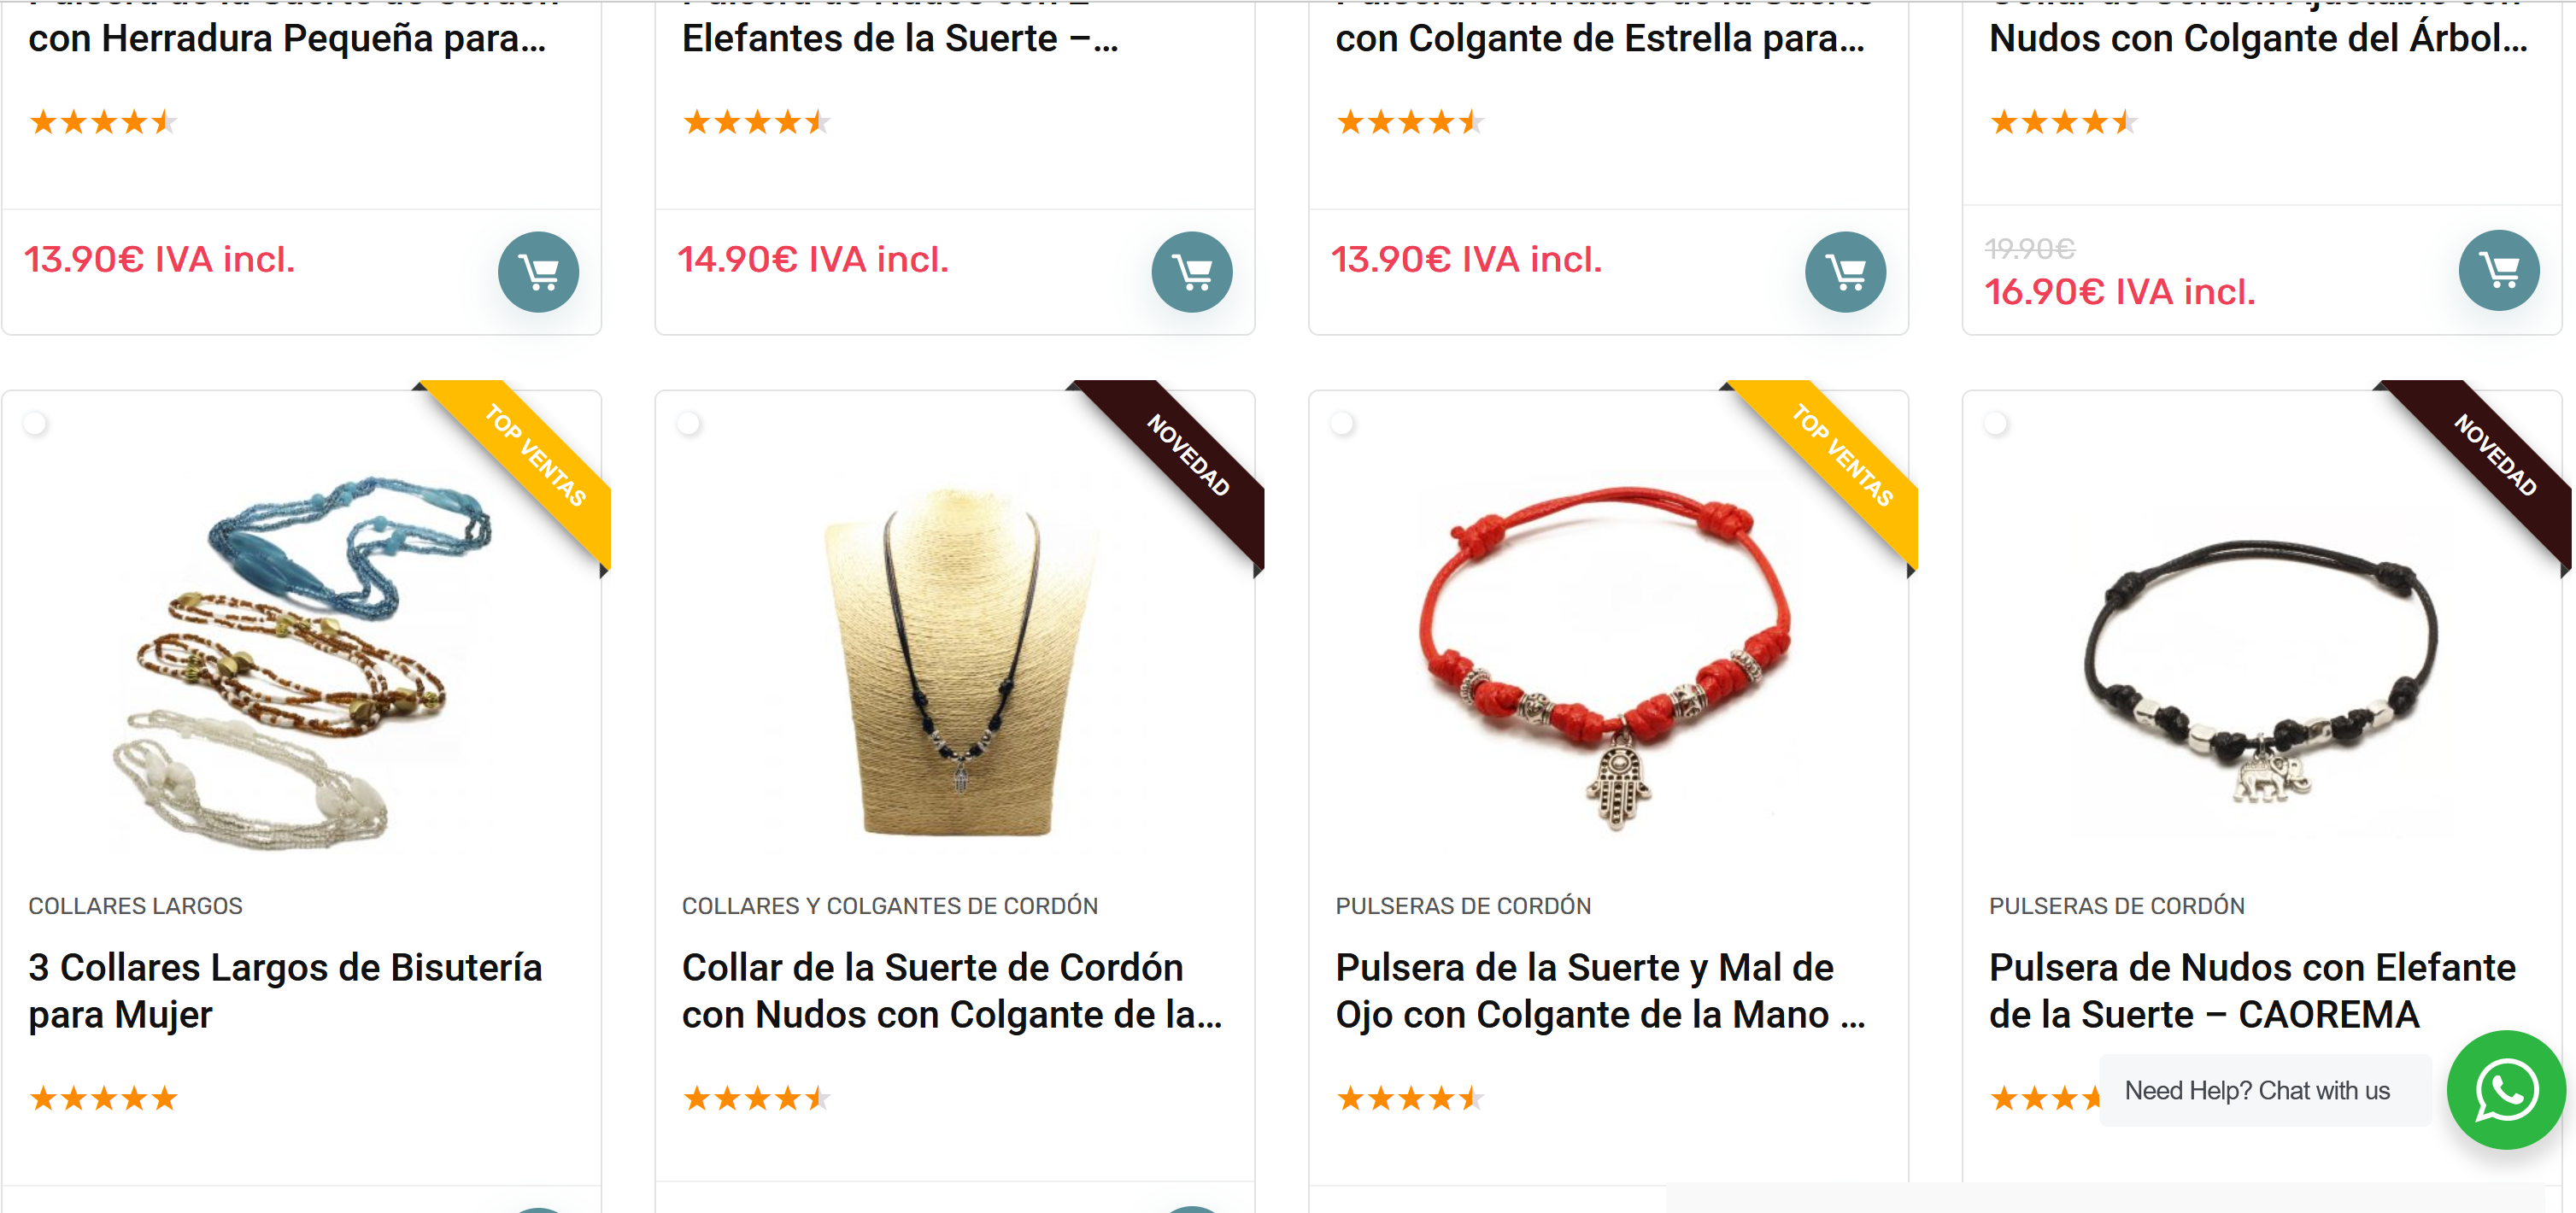

In [1]:
from IPython.display import Image
Image(filename='Captura.png')

Se pide hacer un buscador que permita recuperar información de la página. Para ello se le mostrará al usuario 4 opciones entre las que tiene que elegir: Buscar por categoría, Buscar por etiqueta top-ventas o novedad, Buscar por precio o Buscar por descripción.

__Buscar por categoría__[2,5 puntos]

Si elige esta opción se le mostrará un listado con las 5 categorías de productos:Pulseras de Nudos, Collares de Cordón, Chakras y Energía Positiva,Bisutería y Collares Largos. Para facilitar la selección se asignará un número a cada categoria, de manera que el usuario elija por número.Una vez elegido una categoría, el programa mostrará una lista de todas las objetos que pertenecen a esa categoría (asignar un número a cada objeto para que sea más fácil elegir el objeto).  A continuación, el usuario elegirá un objeto y el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y nombre de productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos de la categoría seleccionada previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú , y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

__Buscar por etiqueta top-ventas o novedad__[2,5 puntos]

Si elige esta opción se le mostrará un listado con 2 opciones:Top-ventas, y Novedad. Para facilitar la selección se asignará un número a cada etiqueta, de manera que el usuario elija por número.Una vez elegido una etiqueta, el programa mostrará una lista de todas las objetos que tienen asociada esa etiqueta (asignar un número a cada objeto para que sea más fácil elegir el objeto).  A continuación, el usuario elegirá un objeto y el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y nombre de productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos de la etiqueta seleccionada previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú , y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

__Buscar por precio__[2,5 puntos]

Si elige esta opción se le mostrará una caja de texto donde se le pregunte cuánto desea gastarse, de manera que el usuario introducirá una precio (puede ser un númeror decimal). El programa mostrára un listado con todos los objetos cuyo precio es igual o menor al dado (se muestra el nombre del objeteo y el precio), de manera que el usuario pueda seleccionar uno de los objetos para ver más información. Para facilitar la selección se asignará un número a cada objeto, de manera que el usuario elija por número.Una vez elegido un objeto, el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y nombre de productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos recuperados previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú ,y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

__Buscar por descripción__[2,5 puntos]

Si elige esta opción se le mostrará una caja de texto donde el usuario deberá introducir una o más palabras clave. El programa mostrára un listado con todos los objetos en los que alguna de las palabras clave introducidas por el usuario aparezcan en los textos sobre las características de producto, de manera que el usuario pueda seleccionar uno de los objetos para ver más información. Para facilitar la selección se asignará un número a cada objeto, de manera que el usuario elija por número.Una vez elegido un objeto, el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos recuperados previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú ,y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

Para hacer  los ejercicios, tened en cuenta:

* En primer lugar, analizar la página donde se va recuperar la información, y buscar donde se encuentra la información que se necesita. Por ejemplo para el primer menú se analiza la página principal del sitio y se puede observar que la información que se busca está al principio de la página tal como se ve en la captura

In [18]:
import urllib
from bs4 import BeautifulSoup
from IPython.display import Image
import requests

#Mostrar informacion del producto
def info(link):
    html=urllib.request.urlopen(link).read()
    soup=BeautifulSoup(html, 'html.parser')
    result = soup.find("div", attrs={"id":"contents-section-woo-area", "class":"post"})

    #Nombre
    print("Nombre:\n" + result.contents[1].contents[7].contents[1].contents[1].contents[3].text)

    #Precio
    print("\nPrecio: \n" + result.contents[1].contents[7].contents[3].contents[1].contents[0].contents[0].text)

    #Puntuacion
    print("\nPuntuacion: \n" + result.contents[1].contents[7].contents[1].contents[5].contents[0].text)

    #Colores
    colores = soup.find_all("span", attrs={"class":"variable-item-span variable-item-span-button"})
    print("\nColores: ")
    j = 1
    for i in colores:
        print(str(j) + ". " + i.contents[0].text)
        j += 1

    #Etiqueta
    print("\nEtiqueta:\n" + result.contents[1].contents[7].contents[1].contents[1].contents[1].text)

    #Caracteristicas
    caracteristicas = soup.find_all("ul", attrs={"class": None})
    print("\nCaracteristicas:")
    j = 1
    for i in caracteristicas[0].contents:
        if(j % 2 != 1):
            print(i.text + "\n")
        j +=1

    #Productos relacionados
    j = 1
    print("\nProductos relacionados:\n")
    for i in result.contents[1].contents[16].contents[3].contents[1].contents:
        if(i != "\n"):
            print(str(j) + ". " + i.contents[9].contents[1].text)
            j += 1

    #Imagen
    print("\nImagen:\n")
    display(Image(result.contents[1].contents[5].contents[2].contents[1].contents[1].contents[0].get("href")))

In [19]:
import urllib
from bs4 import BeautifulSoup
from IPython.display import Image
import requests

def buscarPorCategoria():
    ok=True
    while(ok):
        #Obtener las categorias
        li = list()
        html=urllib.request.urlopen("https://caorema.com").read()
        soup=BeautifulSoup(html, 'html.parser')
        elem = soup.find_all('li', attrs={"class":"menu-item menu-item-type-post_type menu-item-object-page"})
        i = 0
        for x in elem:
            if(i == 5):
                break
            children = x.findChildren("a" , recursive=False)
            for child in children:
                print(str(i+1) + ". " + child.contents[0].text)
                li.append(child.get("href"))
            i+=1

        categoria = input("Selecciona el numero de la categoria: ")
        print("\n")

        #Acceder todos lo productos de la categoria
        link = li[int(categoria)-1]
        li = list()
        html=urllib.request.urlopen(link).read()
        soup=BeautifulSoup(html, 'html.parser')
        elem = soup.find_all("li", attrs={"class":"wc-block-grid__product"})

        #Conseguir el nombre y el enlace del producto
        for i in elem:
            li.append([i.contents[1].contents[3].text, i.contents[1].get("href")])
        i = 1
        for h in li:
            print(str(i) + ". " + h[0])
            i += 1

        pulsera = input("Selecciona el numero de la pulsera: ")
        print("\n")
        link = li[int(pulsera)-1][1]

        #Mostrar info
        info(link)

        res=input("Desea realizar otra busqueda(SI/NO):\n ")
        if(res.upper() == "NO"):
            ok=False

In [20]:
import urllib
from bs4 import BeautifulSoup
from IPython.display import Image
import requests

def buscarPorEtiqueta():
    ok=True
    while(ok):
        print("Seleccione el numero del criterio de búsqueda: ")
        print("1. Top Ventas")
        print("2. Novedad")
        ops=input()
        if(ops == "1"):
            ops = "Top Ventas"
        elif(ops == "2"):
            ops = "Novedad"
        print("\n")

        l=list()
        link = "https://caorema.com/"

        while (link!=None):
            #Obtener todos los producots de la pagina actual
            html=urllib.request.urlopen(link).read()
            soup=BeautifulSoup(html, 'html.parser')
            elem = soup.find_all("div", attrs={"class":"product col_item woo_grid_compact two_column_mobile type-product"})

            for i in elem:
                #Comprobar si tiene una etiqueta deseado
                if(i.contents[3].text == ops):
                    l.append([i.contents[5].contents[1].get("href"), i.contents[9].contents[1].text])
            #Comprobar si tiene pagina siguiente
            nextPage = soup.find('li', attrs={"class": "next_paginate_link"})
            if(nextPage == None):
                link = None
            else:
                link = nextPage.contents[0].get("href")

        cont=1
        for x in l:
            print(str(cont) + ". " + x[1])
            cont+=1
            
        num=input("Introduzca número del elemento que desea consultar:")
        print("\n")

        #Mostrar info
        info(l[int(num)-1][0])

        res=input("Desea realizar otra busqueda(SI/NO):\n ")
        if(res.upper() == "NO"):
            ok=False

In [21]:
import urllib
from bs4 import BeautifulSoup
from IPython.display import Image
import requests

def buscarPorPrecio():
    ok=True
    while(ok):
        li = list()
        precio = input("Introduzca una cantidad de precio: ")
        print("\n")
        precio = float(precio)
        link = "https://caorema.com"

        while(link != None):
            #Obtener todos los producots de la pagina actual
            html=urllib.request.urlopen(link).read()
            soup=BeautifulSoup(html, 'html.parser')
            elem = soup.find_all('div', attrs={"class":"product col_item woo_grid_compact two_column_mobile type-product"})
            for i in elem:
                lista = i.contents[15].contents[1].contents[1].contents
                precioProducto = 0

                #Comprobar si el producto tiene descuento
                if(len(lista) != 3):
                    precioProducto = i.contents[15].contents[1].contents[1].contents[2].text[:-1]
                else:
                    precioProducto = i.contents[15].contents[1].contents[1].contents[0].text[:-1]
                nombreProducto = i.contents[9].contents[1].text
                linkProducto = i.contents[5].contents[1].get("href")

                #Comprobar si el precio del producto es inferior al pedido
                if(float(precioProducto) <= precio):
                    li.append([nombreProducto, linkProducto, precioProducto])

            #Comprobar si tiene pagina siguiente
            nextPage = soup.find('li', attrs={"class": "next_paginate_link"})
            if(nextPage == None):
                link = None
            else:
                link = nextPage.contents[0].get("href")

        if (len(li) != 0):
            i=1
            for x in li:
                print(str(i) +". "+ x[0] + " -> " + x[2] + "€")
                i += 1

            pulsera = input("Selecciona el numero de la pulsera: ")
            print("\n")
            link = li[int(pulsera)-1][1]

            #Mostrar info
            info(link)
        else:
            print("No se han encontrado productos\n")

        res=input("Desea realizar otra busqueda(SI/NO):\n ")
        if(res.upper() == "NO"):
            ok=False

In [22]:
import urllib
from bs4 import BeautifulSoup
from IPython.display import Image
import requests

def buscarPorDescripcion():
    ok=True
    while(ok):
        li = list()
        lista = list()
        words=input("Introduce las palabras a buscar: ")
        print("\n")
        query = words.lower().split()
        link="https://caorema.com"

        while(link != None):
            #Obtener todos los productos de la pagina actual
            html=urllib.request.urlopen(link).read()
            soup=BeautifulSoup(html, 'html.parser')
            elem = soup.find_all('h3', attrs={"class":"text-clamp text-clamp-2"})

            for i in elem:
                #Obtener las caracteristicas del producto
                lprod=urllib.request.urlopen(i.contents[1].get("href")).read()
                soup1=BeautifulSoup(lprod, 'html.parser')
                result = soup1.find_all("ul", attrs={"class": None})
                
                #Obtenemos el nombre y el enlace para obtener informacion detallada del producto
                enlace = i.contents[1].get("href")
                nombre = i.contents[1].text
                
                #Buscar en las caracteristicas si tiene alguna de las palabras
                for word in query:
                    #Si la palabra aparece en las caracteristicas
                    if word in result[0].text.lower().split():
                        if(nombre not in lista):
                            lista.append(nombre)
                            li.append([nombre, enlace])
                        break

            nextPage = soup.find('li', attrs={"class": "next_paginate_link"})
            if(nextPage == None):
                link = None
            else:
                link = nextPage.contents[0].get("href")

        if (len(li) != 0):
            i=1
            for x in li:
                print(str(i)+"."+x[0])
                i += 1
            pulsera = input("Selecciona el numero de la pulsera: ")
            print("\n")
            link = li[int(pulsera)-1][1]

            #Mostrar info
            info(link)
        else:
            print("No se han encontrado productos con esos criterios de busqueda\n")

        res=input("Desea realizar otra busqueda(SI/NO):\n ")
        if(res.upper() == "NO"):
            ok=False

Introduce el buscador:
1. Buscar por categoría
2. Buscar por etiqueta top-ventas o novedad
3. Buscar por precio
4. Buscar por descripción
Introduzca el numero:1


1. Pulseras de Nudos
2. Collares de Cordón
3. Chakras y Energía Positiva
4. Bisutería
5. Collares Largos
Selecciona el numero de la categoria: 1


1. Pulsera de Hilo y Cordón con Nudos y Motivos de Acero para Hombre y Mujer en Negro
2. Pulsera de Hilo y Cordón con Nudos y Motivos de Acero para Hombre y Mujer en Azul
3. Pulsera de Nudos de la Suerte con Colgante de Estrella de Mar
4. Pulsera Verde de los 7 Nudos de la Suerte con Colgante de Herradura para Atraer Fortuna
5. Pulsera Roja de los 7 Nudos de la Suerte con Colgante de Estrella para Alejar el Mal de Ojo y Atraer Fortuna
6. Pulsera Roja y Verde de los 7 Nudos de la Suerte para Alejar el Mal de Ojo y Atraer Fortuna
7. Pulsera Azul de Cordón y Nudos con Motivos de Acero para Hombre y Mujer
8. Pulsera de la Suerte con Nudos y Colgante de 3 Herraduras
9. Pulsera de Hilo y

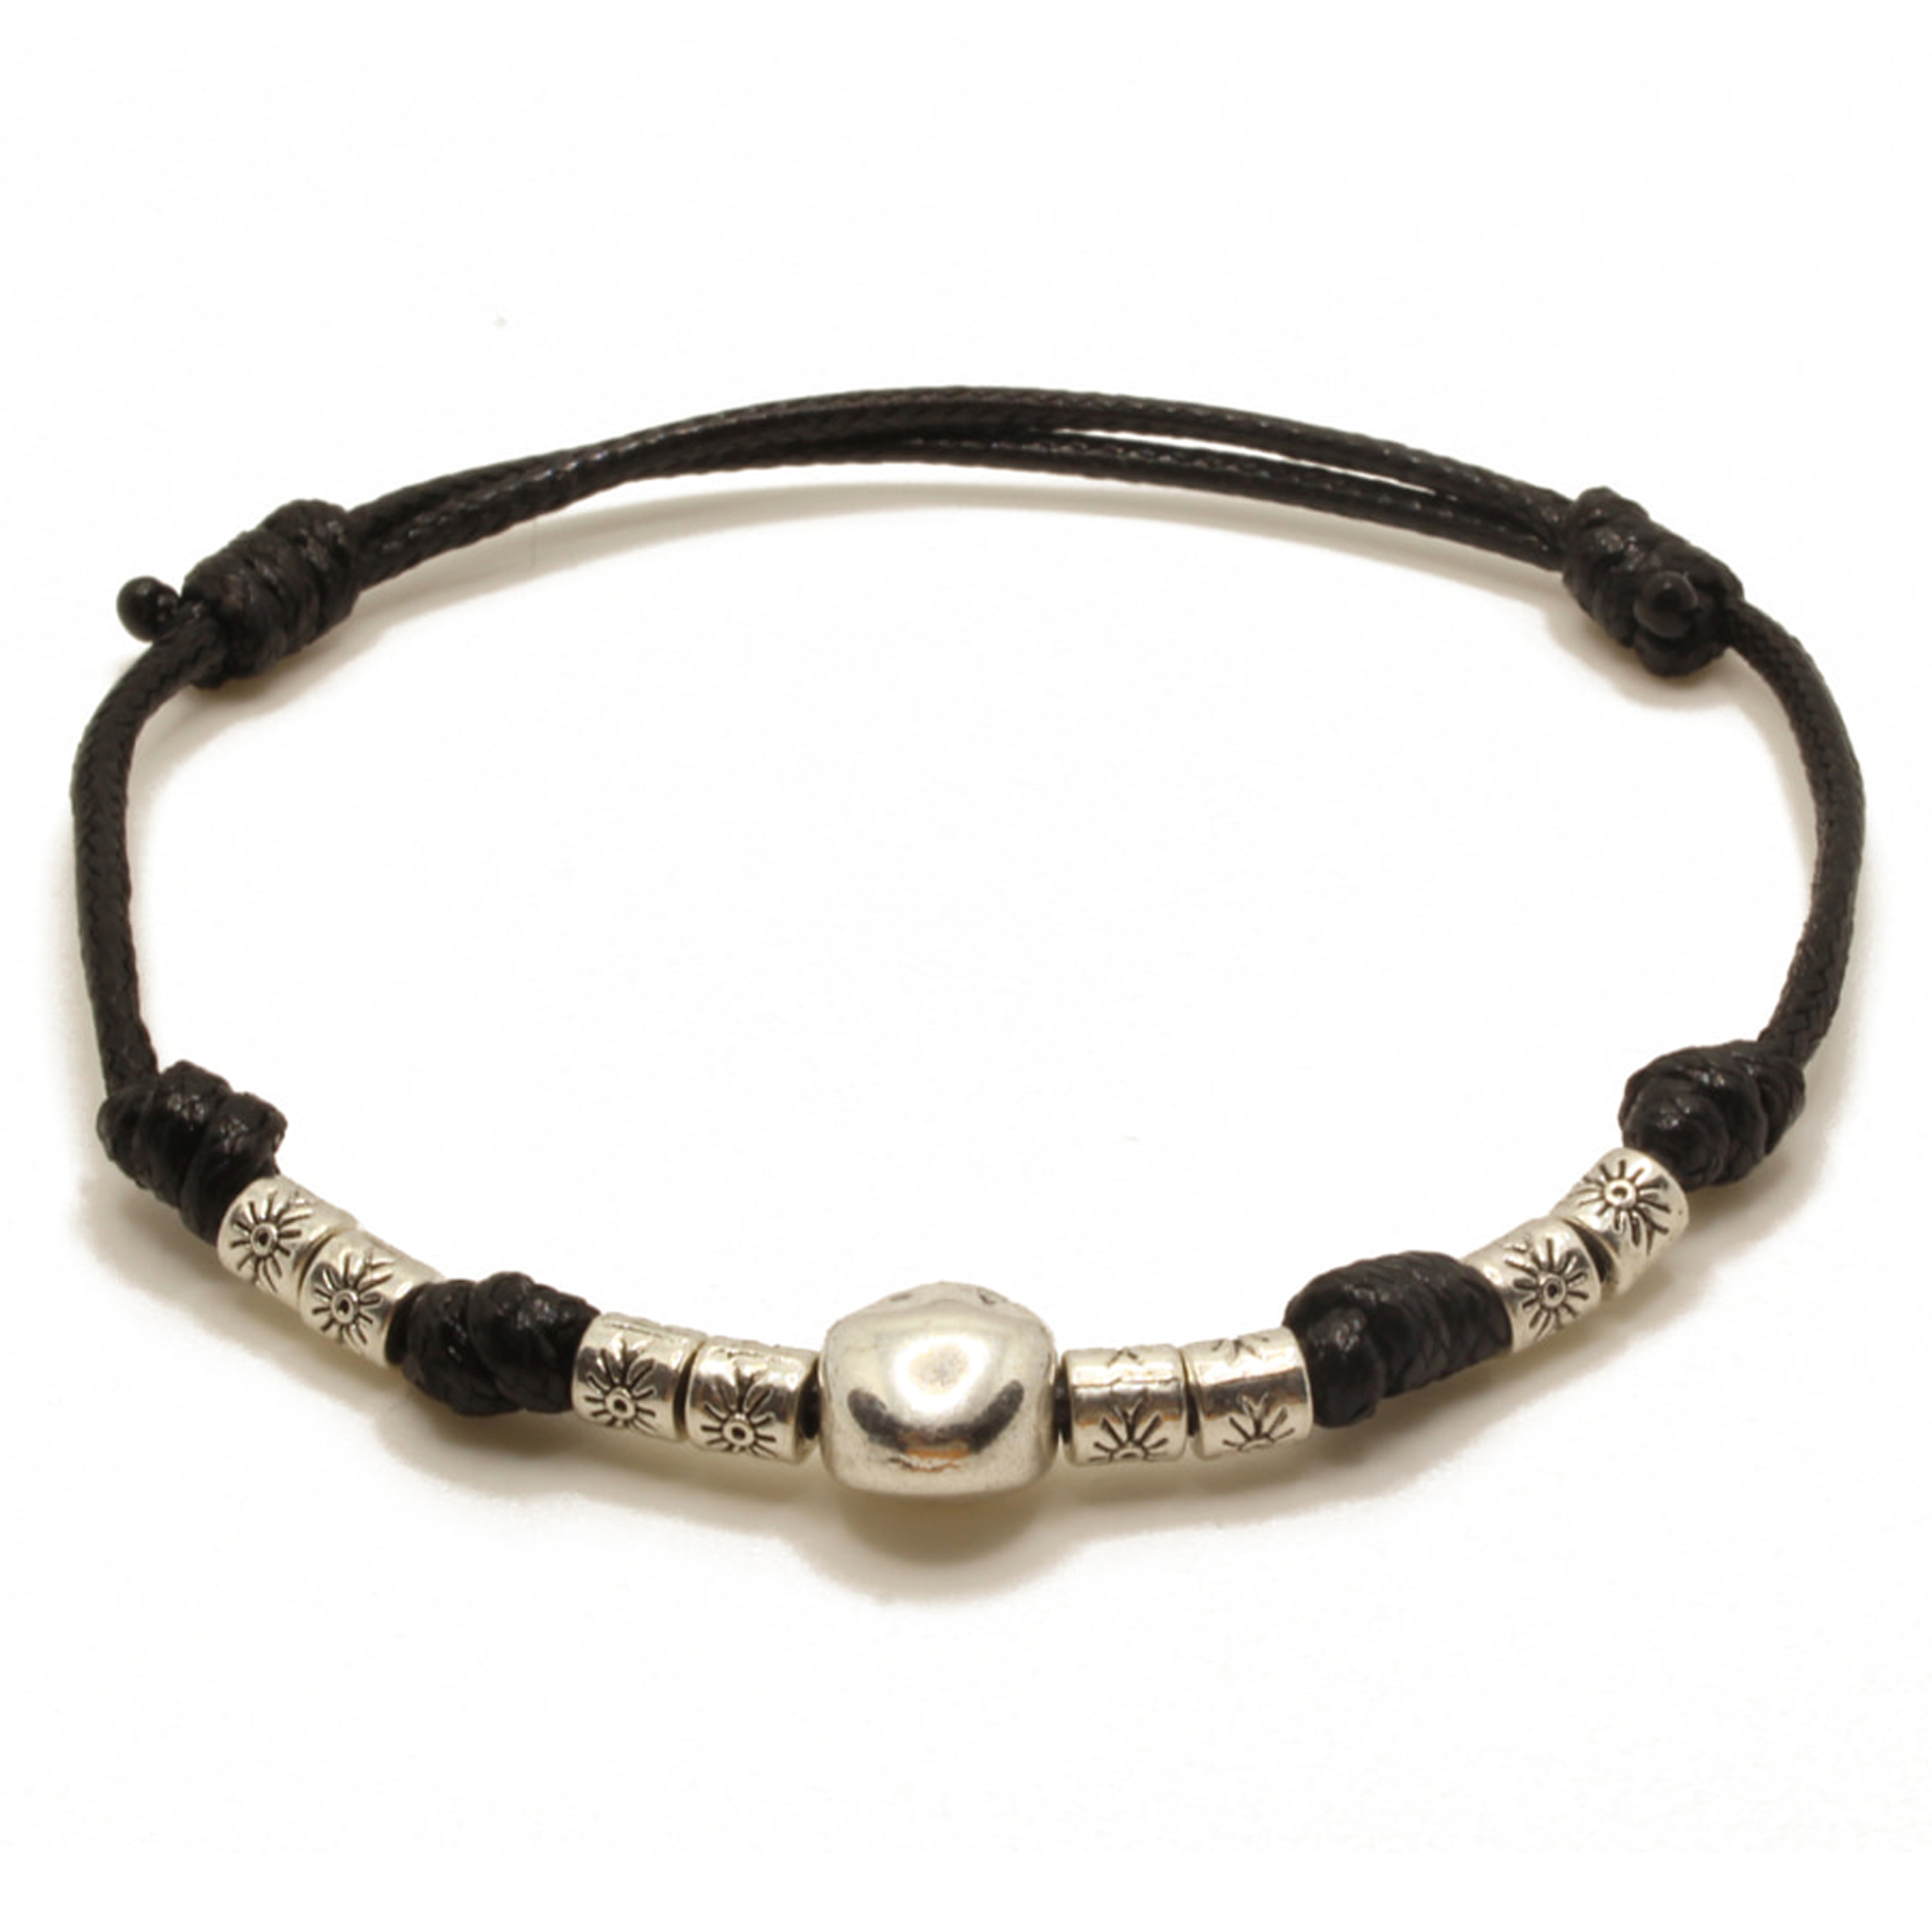

Desea realizar otra busqueda(SI/NO):
 no
Deseas salir del Menu Principal(SI/NO):
no
Introduce el buscador:
1. Buscar por categoría
2. Buscar por etiqueta top-ventas o novedad
3. Buscar por precio
4. Buscar por descripción
Introduzca el numero:2


Seleccione el numero del criterio de búsqueda: 
1. Top Ventas
2. Novedad
1


1. Pulsera de Nudos de la Suerte con Colgante del Árbol de la Vida
2. Collar con Colgante de los 7 Chakras Redondo
3. Pulsera de Bisutería de Malla para Mujer en Acero Antialérgico
4. Pulsera de la Suerte de Cordón con Herradura Pequeña para Mujer
5. Pulsera con Nudos de la Suerte con Colgante de Estrella para Hombre y Mujer
6. 3 Collares Largos de Bisutería para Mujer
7. Pulsera de la Suerte y Mal de Ojo con Colgante de la Mano de Fátima
8. 5 Collares Largos de Bisutería para Mujer
9. Pulsera de Bisutería de Malla para Mujer con Motivo y dibujo de Oso
10. Pulsera de la Suerte con Nudos y Colgante de Trébol para Hombre y Mujer
11. Collar con Colgante de los 7 chakras 

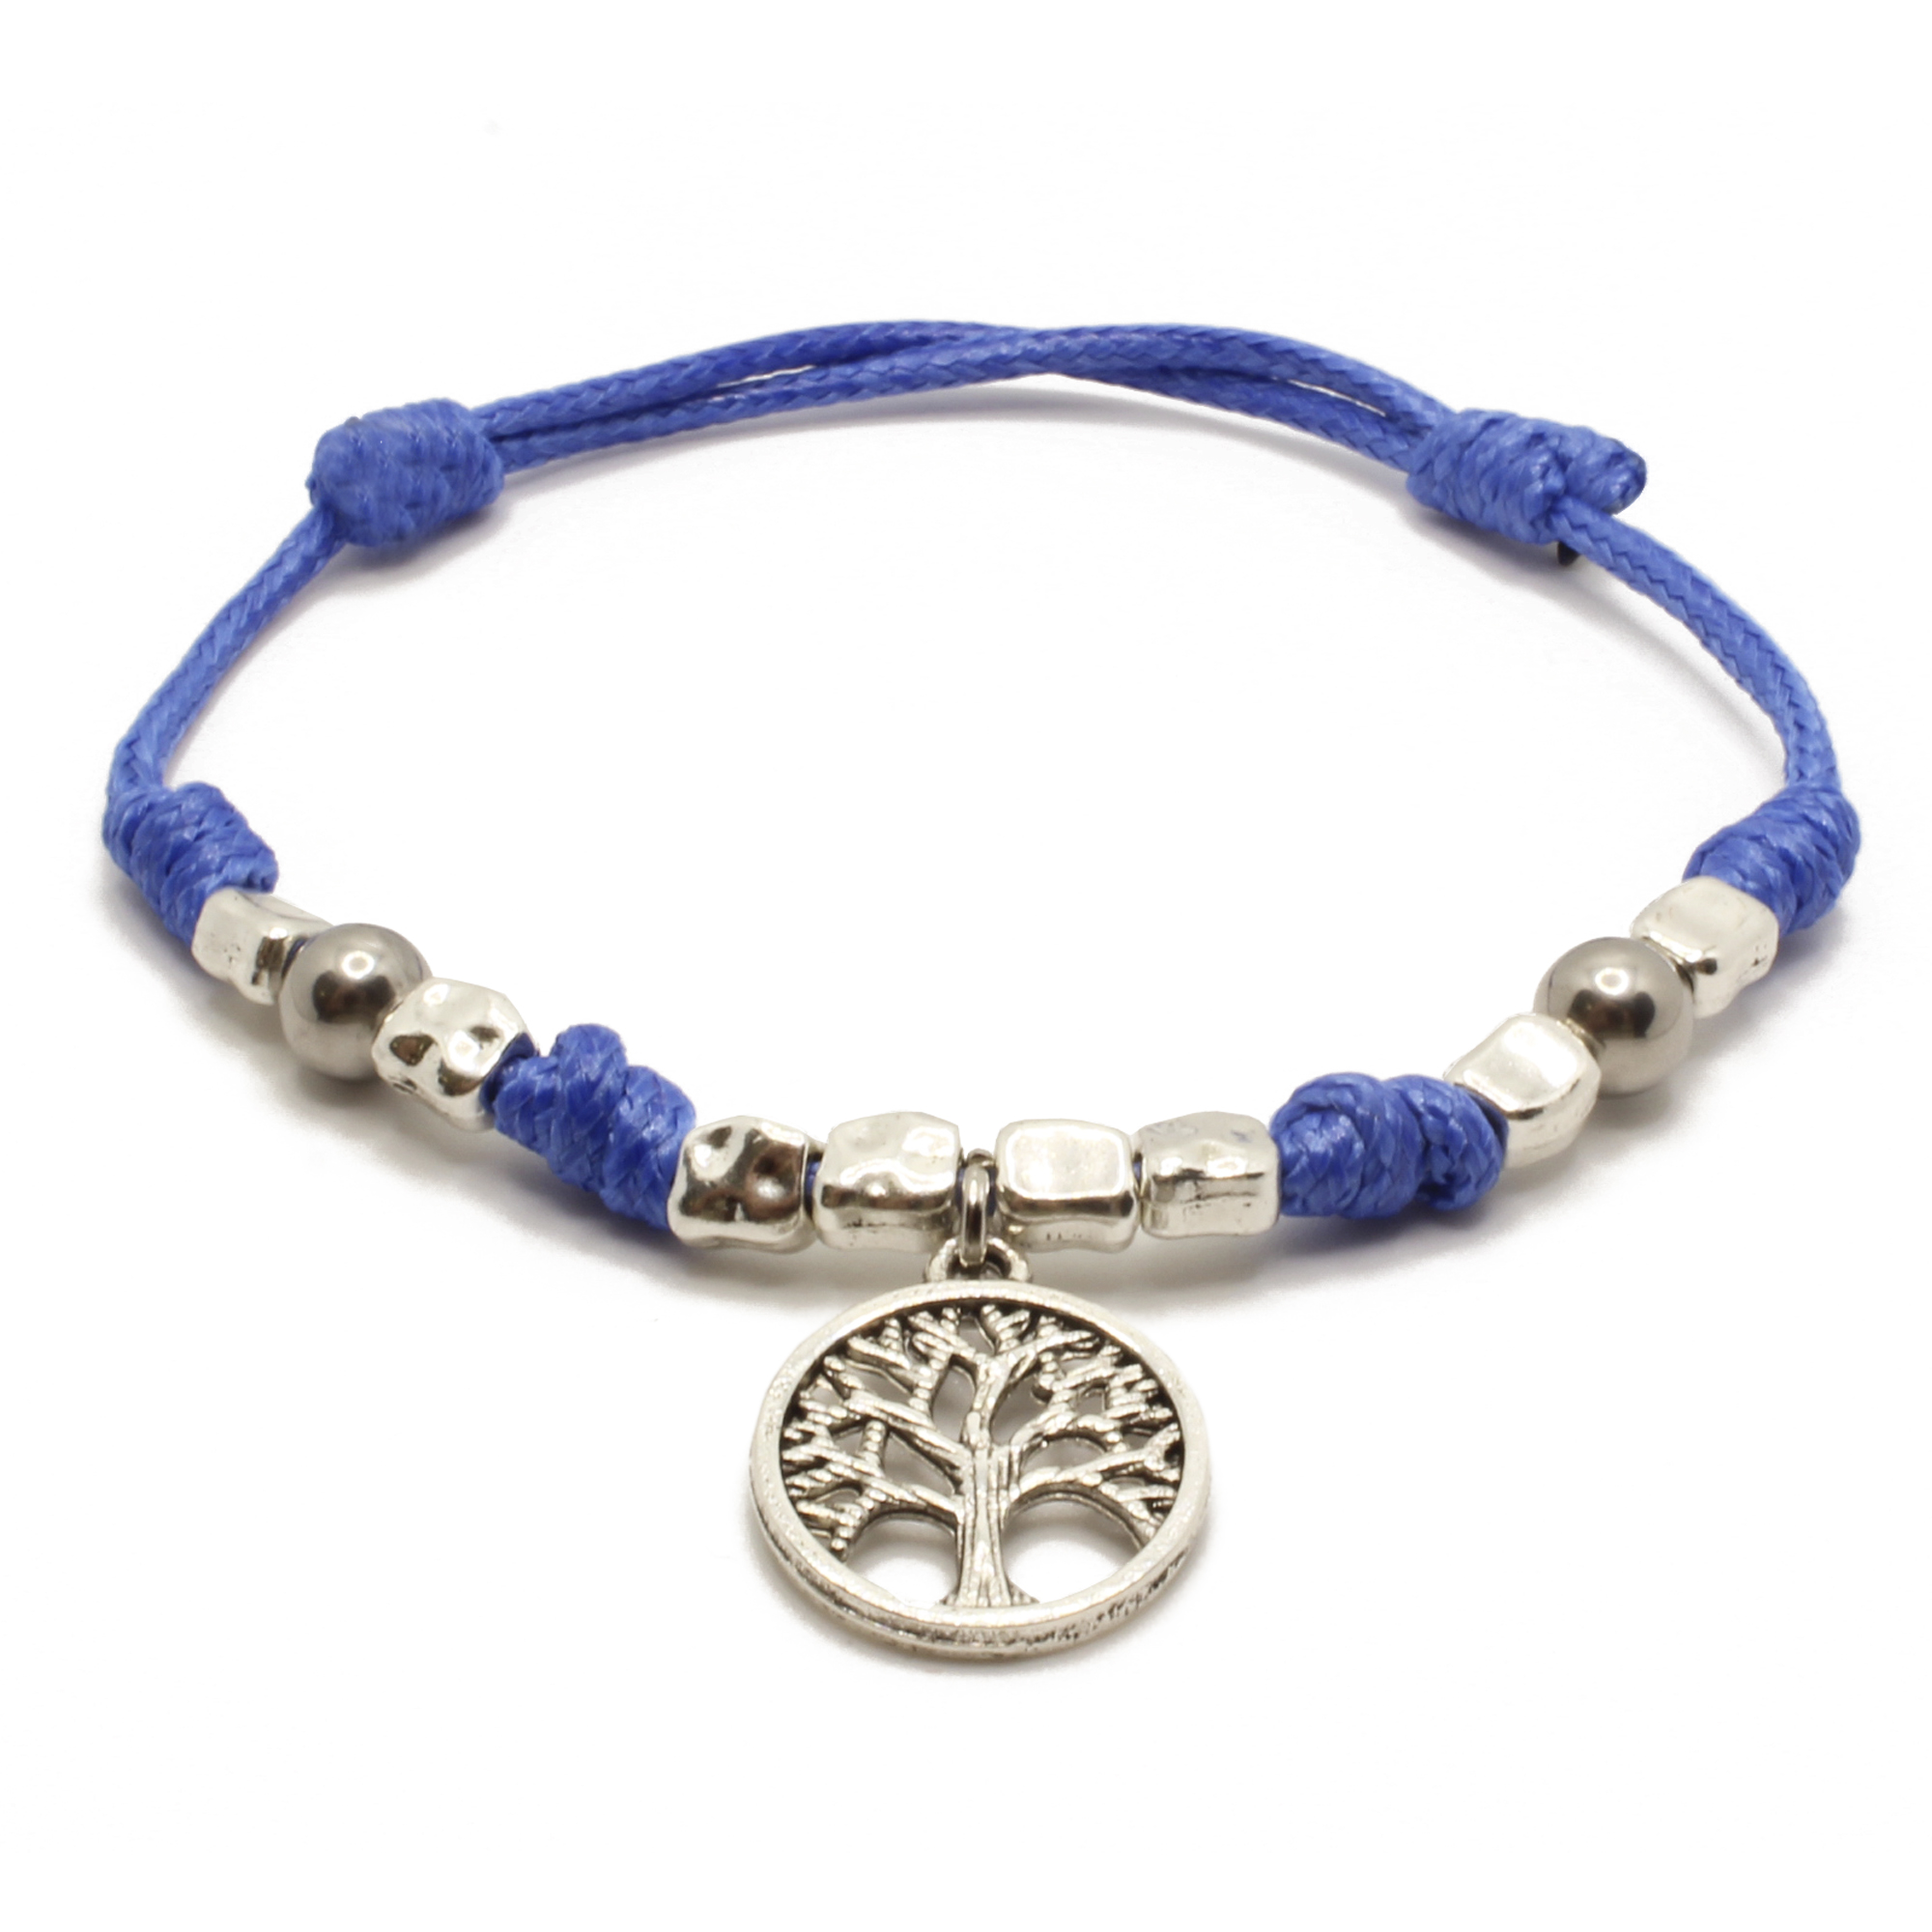

Desea realizar otra busqueda(SI/NO):
 no
Deseas salir del Menu Principal(SI/NO):
no
Introduce el buscador:
1. Buscar por categoría
2. Buscar por etiqueta top-ventas o novedad
3. Buscar por precio
4. Buscar por descripción
Introduzca el numero:3


Introduzca una cantidad de precio: 15


1. Pulsera de Nudos de la Suerte con Colgante del Árbol de la Vida -> 12.90€
2. Collar con Colgante de los 7 Chakras Redondo -> 11.90€
3. Pulsera de la Suerte de Hilo y Cordón con Colgante de Herradura -> 13.90€
4. Pulsera de la Suerte de Cordón con Herradura Pequeña para Mujer -> 13.90€
5. Pulsera de Nudos con 2 Elefantes de la Suerte – CAOREMA -> 14.90€
6. Pulsera con Nudos de la Suerte con Colgante de Estrella para Hombre y Mujer -> 13.90€
7. 3 Collares Largos de Bisutería para Mujer -> 9.90€
8. Pulsera de la Suerte y Mal de Ojo con Colgante de la Mano de Fátima -> 13.90€
9. Pulsera de Nudos con Elefante de la Suerte – CAOREMA -> 13.90€
10. Collar con Nudos de la Suerte y Colgante de Herradura -> 14.9

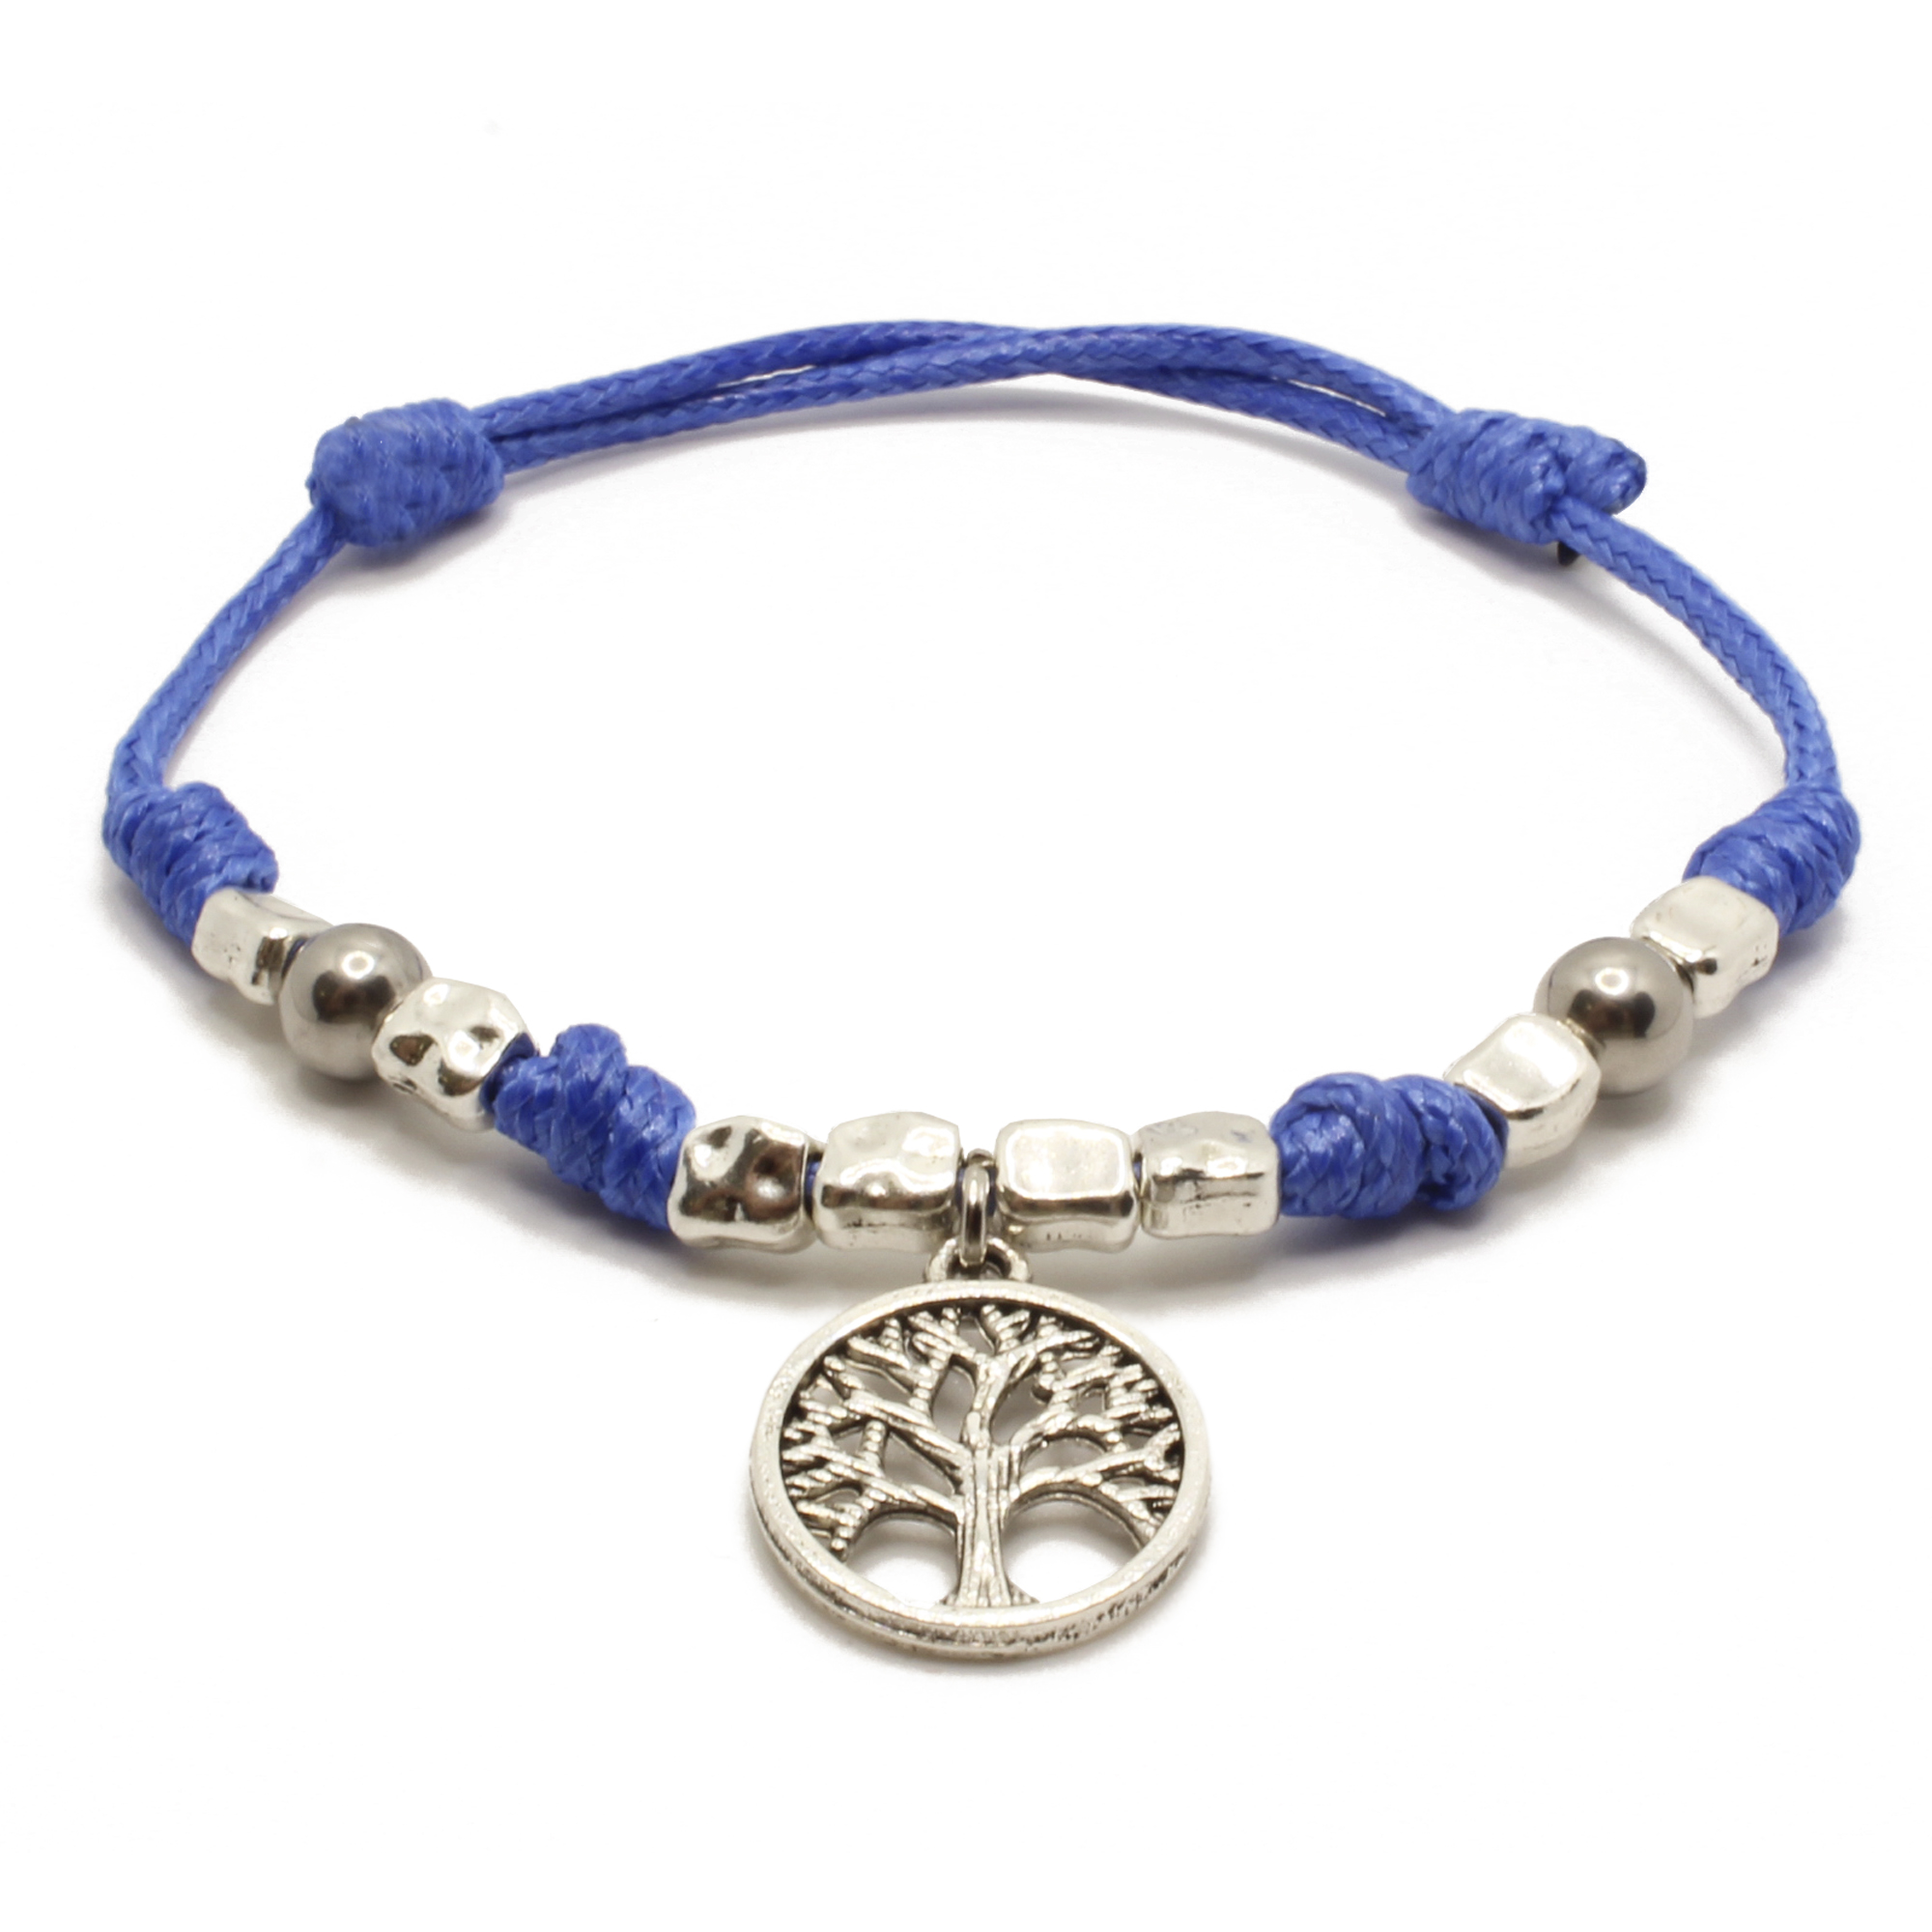

Desea realizar otra busqueda(SI/NO):
 no
Deseas salir del Menu Principal(SI/NO):
no
Introduce el buscador:
1. Buscar por categoría
2. Buscar por etiqueta top-ventas o novedad
3. Buscar por precio
4. Buscar por descripción
Introduzca el numero:4


Introduce las palabras a buscar: suerte


1.Pulsera de la Suerte de Hilo y Cordón con Colgante de Herradura
2.Pulsera de la Suerte de Cordón con Herradura Pequeña para Mujer
3.Pulsera de Nudos con 2 Elefantes de la Suerte – CAOREMA
4.Pulsera con Nudos de la Suerte con Colgante de Estrella para Hombre y Mujer
5.Collar de la Suerte de Cordón con Nudos con Colgante de la Mano de Fátima
6.Pulsera de la Suerte y Mal de Ojo con Colgante de la Mano de Fátima
7.Pulsera de Nudos con Elefante de la Suerte – CAOREMA
8.Collar con Nudos de la Suerte y Colgante de Herradura
9.Pulsera de Hilo y Cordón Ajustable con Nudos de la Suerte y Colgante de 3 Estrellas Unisex
10.Pulsera Roja de Nudos con 3 Elefantes de la Suerte – CAOREMA
11.Pulsera Mal de Ojo con Man

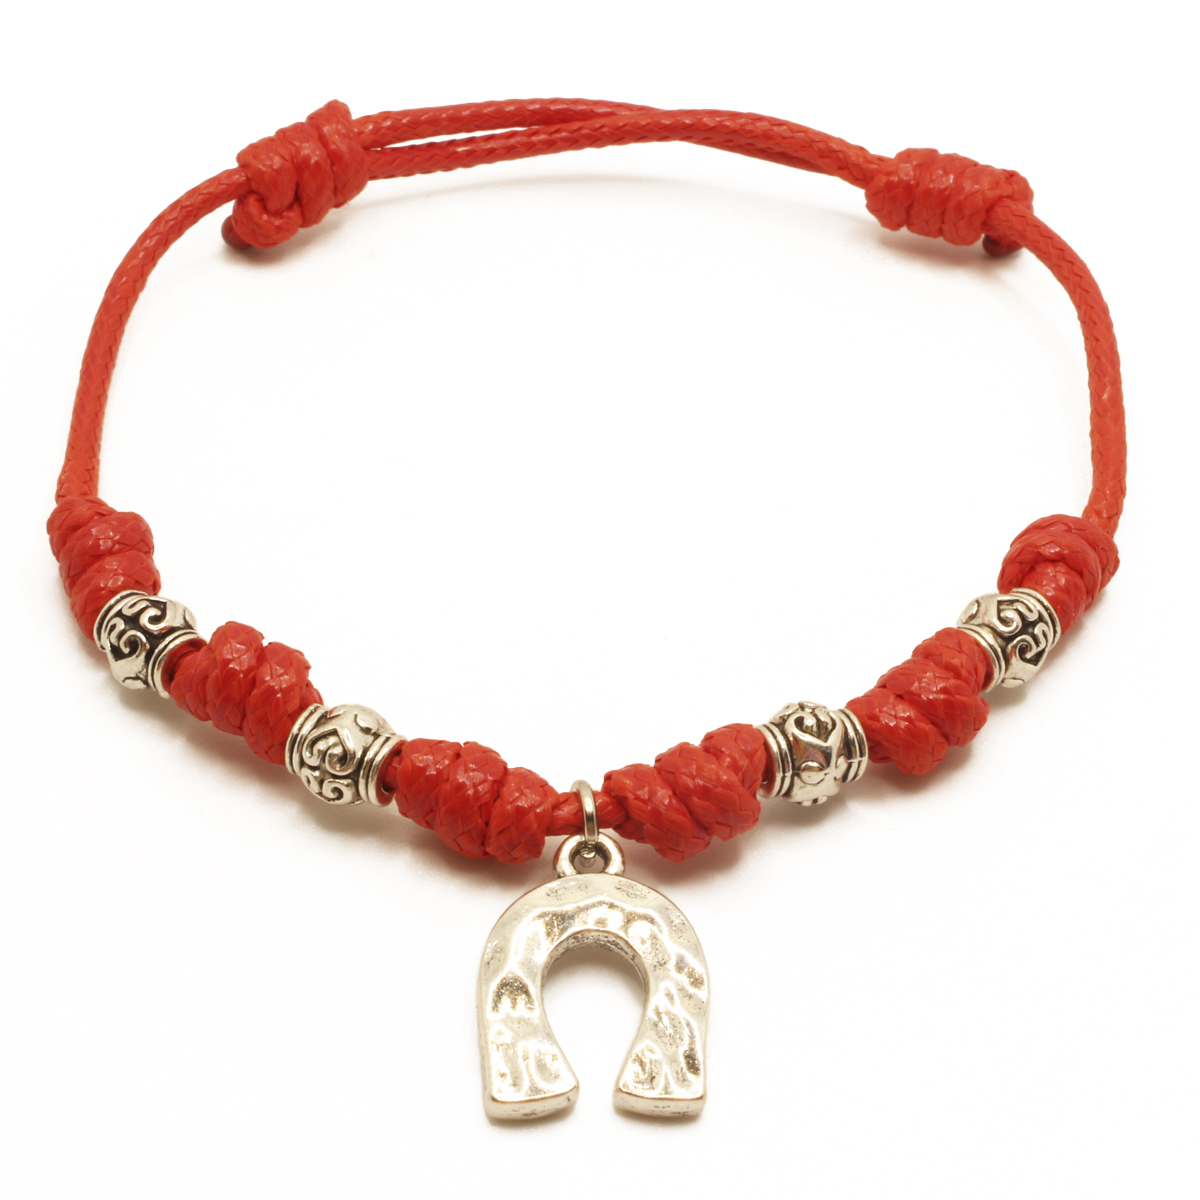

Desea realizar otra busqueda(SI/NO):
 no
Deseas salir del Menu Principal(SI/NO):
si


In [23]:
ok=True
while(ok):
    print("Introduce el buscador:")
    print("1. Buscar por categoría")
    print("2. Buscar por etiqueta top-ventas o novedad")
    print("3. Buscar por precio")
    print("4. Buscar por descripción")
    opcion = input("Introduzca el numero:")
    print("\n")
    if(opcion == "1"):
        buscarPorCategoria()
    elif(opcion == "2"):
        buscarPorEtiqueta()
    elif(opcion == "3"):
        buscarPorPrecio()
    elif(opcion == "4"):
        #Tarda 1min
        buscarPorDescripcion()
    
    text = input("Deseas salir del Menu Principal(SI/NO):\n")
    if(text.upper() == "SI"):
        ok = False
        

In [1]:
from IPython.display import Image
Image(filename='Captura2.png')

FileNotFoundError: [Errno 2] No such file or directory: 'Captura2.png'

* A continuación, hay que analizar el código fuente de la página web para caracterizar donde se encuentra lo que se está buscando. Siguiendo con el ejemplo, se abriría el código fuente de la página principal y se debe buscar donde aparecen los enlaces que se ven en la visualización del html de la página principal. Localizada la información se debe que caracterizar en términos de etiquetas html que es lo que caracteriza a la información buscado. En este ejemplo, se puede comprobar que que los enlaces se encuentran dentro de la etiqueta "</nav class="top_menu">"  la cual es única en toda la página. 

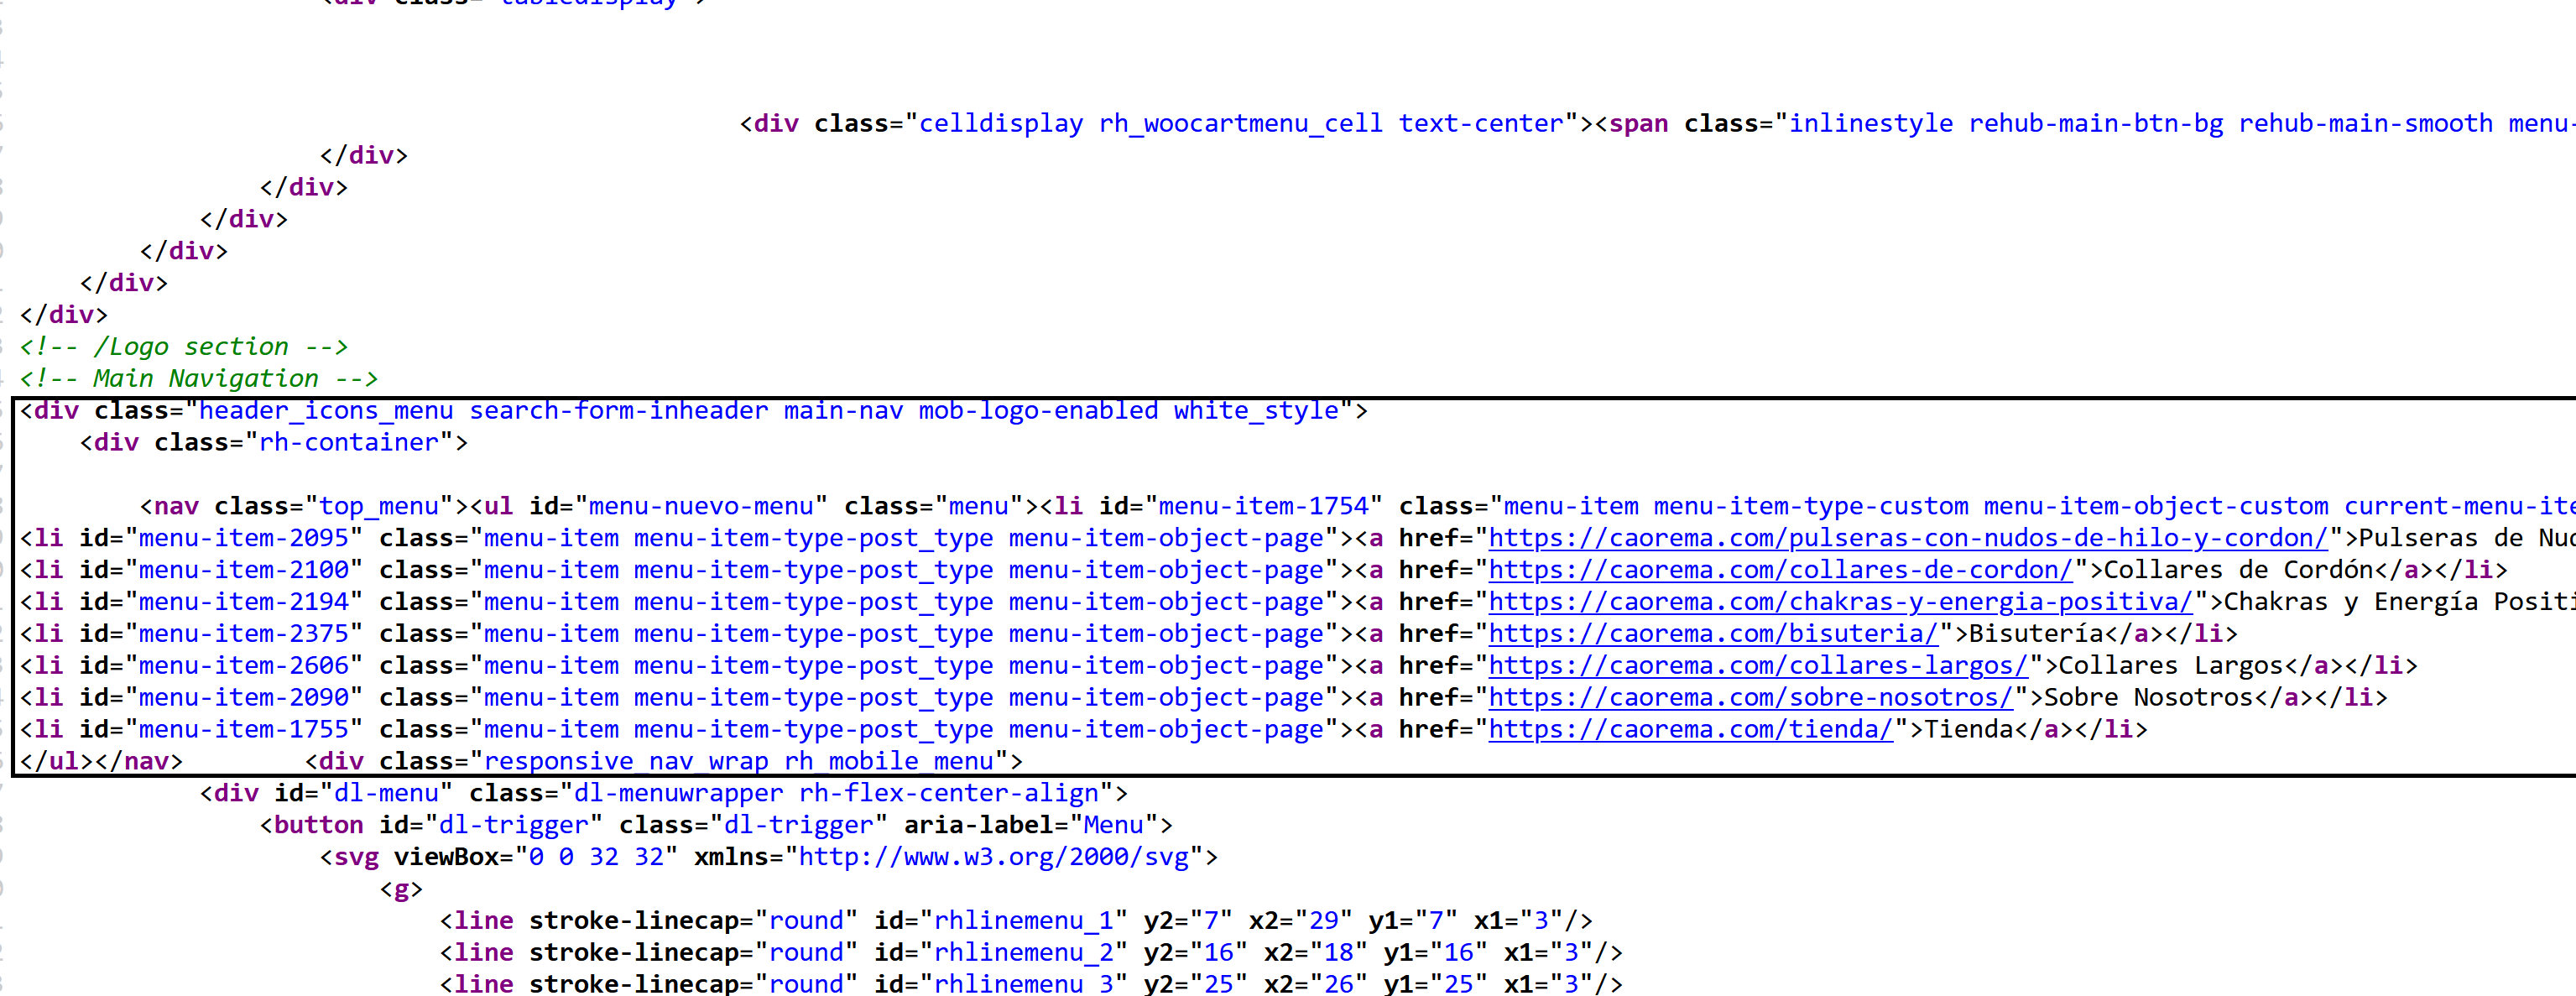

In [3]:
from IPython.display import Image
Image(filename='Captura3.png')

* A continuación se puede usar BeautifulSoup para recuperar ese trozo de código, recuperar la información que se desee,y usarla para lo que sea necesario. Se puede observar que los enlaces a las páginas se encuentran en las anclas dentro de las etiquetas "li".

In [4]:
import urllib
from bs4 import BeautifulSoup
html=urllib.request.urlopen("https://caorema.com/").read()
soup=BeautifulSoup(html, 'html.parser')
etiqueta=soup("nav")
print (etiqueta)

[<nav class="top_menu"><ul class="menu" id="menu-nuevo-menu"><li class="menu-item menu-item-type-custom menu-item-object-custom current-menu-item current_page_item menu-item-home" id="menu-item-1754"><a href="https://caorema.com/">Inicio</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page" id="menu-item-2095"><a href="https://caorema.com/pulseras-con-nudos-de-hilo-y-cordon/">Pulseras de Nudos</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page" id="menu-item-2100"><a href="https://caorema.com/collares-de-cordon/">Collares de Cordón</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page" id="menu-item-2194"><a href="https://caorema.com/chakras-y-energia-positiva/">Chakras y Energía Positiva</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page" id="menu-item-2375"><a href="https://caorema.com/bisuteria/">Bisutería</a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page" id

__Nota: Para realizar los procesamientos es obligatorio utilizar la libreria BeautifulSoup. No se pueden usar otras librerías__

# Normas de entrega

* Fecha tope de entrega: 20/10/2022
* La entrega se realizará subiendo al campus virtual un notebook de Jupyter con la solución. El archivo tendrá como nombre WebScraping_GrupoX donde X será el número de grupo correspondiente.
